**IMPORTS**

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import random
from nltk.corpus import stopwords
import string
from textblob import Word
from sklearn import metrics
nltk.download('omw-1.4')
nltk.download('stopwords')

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer
from sklearn.pipeline import Pipeline

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification,make_regression
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# DATA LOADING

In [2]:
tweets = pd.read_csv("tweet_emotions.csv")
tweets['new_content']=np.nan
tweets=tweets.rename(columns={'sentiment':'emotion'})
tweets.info()
tweets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     40000 non-null  int64  
 1   emotion      40000 non-null  object 
 2   content      40000 non-null  object 
 3   new_content  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ MB


,tweet_id,emotion,content,new_content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,NaN
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,NaN
2,1956967696,sadness,Funeral ceremony...gloomy friday...,NaN
3,1956967789,enthusiasm,wants to hang out with friends SOON!,NaN
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,NaN


In [3]:
#Size of the tweet dataset
tweets.shape

(40000, 4)

In [4]:
#data types for tweets data set
tweets.dtypes

tweet_id         int64
emotion         object
content         object
new_content    float64
dtype: object

In [5]:
#Create data frame for music
music = pd.read_csv("music.csv")
music.shape

(13, 4)

In [6]:
#data types for music data set
music.dtypes

sr_number     int64
emotion      object
genres       object
songs        object
dtype: object

# DATA PREPROCESSING

In [7]:
tweets.columns

Index(['tweet_id', 'emotion', 'content', 'new_content'], dtype='object')

In [8]:
#checking duplicates for each colum
[(i,tweets[i].duplicated().sum()) for i in tweets.columns]

[('tweet_id', 0), ('emotion', 39987), ('content', 173), ('new_content', 39999)]

Text(0, 0.5, 'frequency')

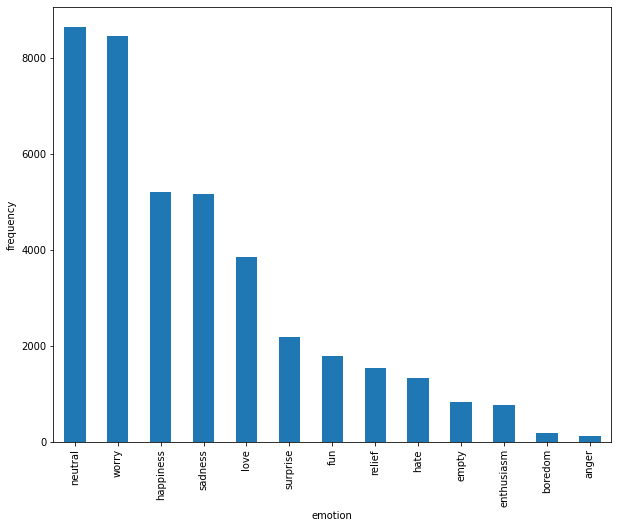

In [9]:
#Finding the distribution of the response variable
plt.figure(figsize=(10, 8))
tweets['emotion'].value_counts().plot(kind='bar')
plt.xlabel('emotion')
plt.ylabel('frequency')

In [11]:
#Data Preprocessing
lemmatizer=WordNetLemmatizer()
stop_words = stopwords.words("english")
def run_test(y):
  for j,i in enumerate(y):
    match=re.search(r'(^@\w+)', i)
    if match:
      match1=re.sub(match.group(),'',i).lower()
      new_word=re.findall(r'(\w+)', match1)
      x=" ".join(lemmatizer.lemmatize(item) for item in new_word if item not in stop_words)
      tweets['new_content'][j]=x
    else:
      new_word=re.findall(r'(\w+)', i.lower())
      x=" ".join(lemmatizer.lemmatize(item) for item in new_word if item not in stop_words)
      tweets['new_content'][j]=x
      continue


In [12]:
y=run_test(tweets['content'])

<ipython-input-11-eafed02c6bf0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['new_content'][j]=x
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
#check if there are any null values after data cleaning
tweets['new_content'].isnull().sum()

0

In [14]:
tweets.shape

(40000, 4)

In [15]:
tweets['emotion'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: emotion, dtype: int64

#DATA SPLITTING

In [16]:
X = tweets['new_content']
y = tweets["emotion"]

In [17]:
cv=CountVectorizer()
X=cv.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10,stratify=y)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        33
     boredom       0.00      0.00      0.00        54
       empty       0.33      0.01      0.02       248
  enthusiasm       0.00      0.00      0.00       228
         fun       0.00      0.00      0.00       533
   happiness       0.32      0.30      0.31      1563
        hate       0.43      0.02      0.03       397
        love       0.44      0.29      0.35      1152
     neutral       0.33      0.40      0.36      2591
      relief       0.12      0.00      0.00       458
     sadness       0.29      0.15      0.20      1549
    surprise       0.04      0.00      0.00       656
       worry       0.28      0.64      0.39      2538

    accuracy                           0.31     12000
   macro avg       0.20      0.14      0.13     12000
weighted avg       0.28      0.31      0.26     12000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


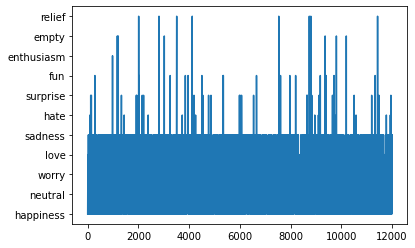

In [18]:
#Multinomial Naive Bayes
model=MultinomialNB()
model.fit(X_train,y_train)
NB_predicted=model.predict(X_test)
print(classification_report(y_test,NB_predicted))
plt.plot(NB_predicted)

In [20]:
#using TF-IDF Transformer 
X = tweets['new_content']
y = tweets["emotion"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10,stratify=y)
tf = TfidfVectorizer(analyzer='word',max_features=1000,ngram_range=(1,3))
x_tf = tf.fit_transform(X_train)
x_val_tf = tf.transform(X_test)

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        33
     boredom       0.00      0.00      0.00        54
       empty       0.14      0.00      0.01       248
  enthusiasm       0.00      0.00      0.00       228
         fun       0.20      0.02      0.03       533
   happiness       0.33      0.35      0.34      1563
        hate       0.44      0.15      0.23       397
        love       0.47      0.37      0.42      1152
     neutral       0.34      0.58      0.43      2591
      relief       0.33      0.03      0.06       458
     sadness       0.35      0.23      0.28      1549
    surprise       0.30      0.03      0.06       656
       worry       0.32      0.47      0.38      2538

    accuracy                           0.34     12000
   macro avg       0.25      0.17      0.17     12000
weighted avg       0.33      0.34      0.31     12000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


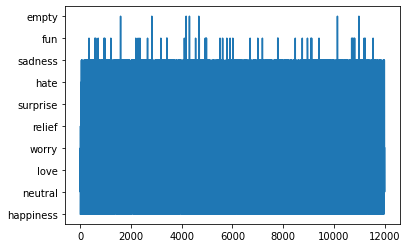

In [21]:
#Logistic Regression
model =LogisticRegression(solver='liblinear',C=1)
model.fit(x_tf,y_train)
Log_predicted=model.predict(x_val_tf)
print(classification_report(y_test,Log_predicted))
plt.plot(Log_predicted)

In [22]:
cv=CountVectorizer()
X=cv.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         0
     boredom       0.00      0.00      0.00         3
       empty       0.00      0.00      0.00        11
  enthusiasm       0.00      0.00      0.00        12
         fun       0.03      0.12      0.05       146
   happiness       0.32      0.32      0.32      1542
        hate       0.17      0.37      0.23       186
        love       0.39      0.45      0.42       997
     neutral       0.59      0.34      0.43      4476
      relief       0.06      0.20      0.09       132
     sadness       0.27      0.31      0.29      1289
    surprise       0.05      0.15      0.07       204
       worry       0.40      0.35      0.37      3002

    accuracy                           0.34     12000
   macro avg       0.17      0.20      0.18     12000
weighted avg       0.43      0.34      0.37     12000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


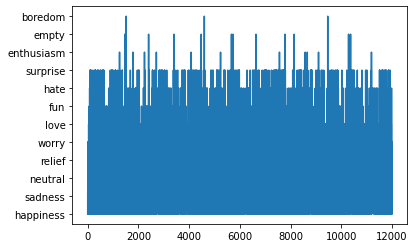

In [23]:
#SVC Model
ymodel = SVC()
model.fit(X_train,y_train)
pred_svm = model.predict(X_test)
print(classification_report(pred_svm, y_test))
plt.plot(pred_svm)

              precision    recall  f1-score   support

       anger       0.04      0.08      0.05        12
     boredom       0.02      0.04      0.03        23
       empty       0.04      0.05      0.05       224
  enthusiasm       0.03      0.04      0.03       165
         fun       0.07      0.09      0.08       409
   happiness       0.26      0.25      0.25      1628
        hate       0.21      0.22      0.22       391
        love       0.33      0.34      0.33      1130
     neutral       0.44      0.32      0.37      3475
      relief       0.07      0.11      0.08       288
     sadness       0.23      0.25      0.24      1370
    surprise       0.06      0.09      0.07       412
       worry       0.30      0.31      0.30      2473

    accuracy                           0.27     12000
   macro avg       0.16      0.17      0.16     12000
weighted avg       0.29      0.27      0.28     12000



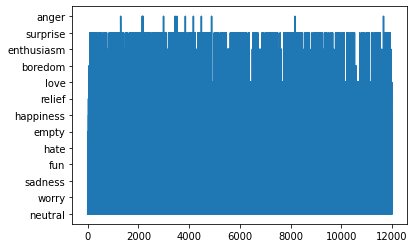

In [24]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
pred_decision = model.predict(X_test)
print(classification_report(pred_decision, y_test))
plt.plot(pred_decision)

In [32]:
#KNN Classifier
knn = KNeighborsClassifier()
k_range = list(range(1, 15))
param_grid = dict(n_neighbors=k_range)
  
# parameter tuning
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
  
# model fitting
grid_search=grid.fit(X_train, y_train)

print(grid_search.best_params_)


Fitting 10 folds for each of 14 candidates, totalling 140 fits
{'n_neighbors': 11}


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        27
     boredom       0.00      0.00      0.00        47
       empty       0.16      0.05      0.08       258
  enthusiasm       0.14      0.00      0.01       215
         fun       0.41      0.06      0.11       509
   happiness       0.47      0.22      0.30      1576
        hate       0.53      0.14      0.22       408
        love       0.48      0.39      0.43      1158
     neutral       0.27      0.90      0.42      2578
      relief       0.64      0.05      0.09       444
     sadness       0.44      0.19      0.26      1504
    surprise       0.23      0.02      0.04       660
       worry       0.55      0.16      0.25      2616

    accuracy                           0.33     12000
   macro avg       0.33      0.17      0.17     12000
weighted avg       0.42      0.33      0.28     12000



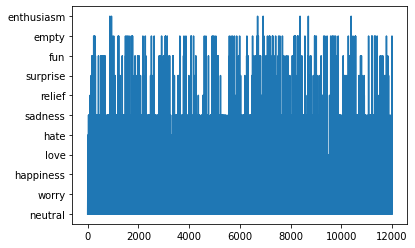

In [30]:
# For the best neighbors
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X, y)
y_test_knn=knn.predict(X_test)
print(classification_report( y_test,y_test_knn))
plt.plot(y_test_knn)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        27
     boredom       0.00      0.00      0.00        47
       empty       0.00      0.00      0.00       258
  enthusiasm       0.00      0.00      0.00       215
         fun       0.18      0.01      0.01       509
   happiness       0.35      0.23      0.28      1576
        hate       0.44      0.17      0.24       408
        love       0.53      0.37      0.43      1158
     neutral       0.29      0.77      0.42      2578
      relief       0.27      0.04      0.07       444
     sadness       0.40      0.18      0.25      1504
    surprise       0.15      0.01      0.02       660
       worry       0.34      0.30      0.32      2616

    accuracy                           0.33     12000
   macro avg       0.23      0.16      0.16     12000
weighted avg       0.33      0.33      0.28     12000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


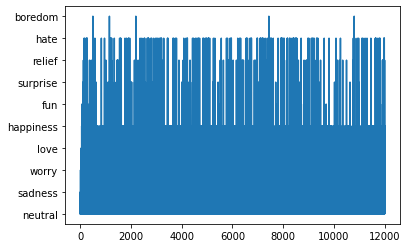

In [31]:
#XGB Classifier
model = XGBClassifier()

model.fit(X_train, y_train)
prod_xgbclassifier = model.predict(X_test)
print(classification_report(y_test,prod_xgbclassifier))
plt.plot(prod_xgbclassifier)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'n_estimators': 50}
[[  27    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   47    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0  238    0    0    0    0    0   17    0    3    0    0]
 [   0    0    0  211    1    0    0    0    1    0    1    0    1]
 [   0    0    0    0  502    2    0    1    3    0    0    1    0]
 [   0    0    0    0    1 1532    0   15   21    2    0    1    4]
 [   0    0    0    0    0    0  405    0    2    1    0    0    0]
 [   0    0    0    0    0    2    0 1142    9    1    2    0    2]
 [   0    0    4    0    0    4    0   13 2541    1    6    0    9]
 [   0    0    0    0    1    1    0    1   11  428    0    0    2]
 [   0    0    0    0    1    3    4    1   17    0 1467    1   10]
 [   0    0    0    0    0    1    0    4   13    0    0  639    3]
 [   0    0    3    0    2    2    0    5   20    0    8    0 2576]]
              precision    recall 

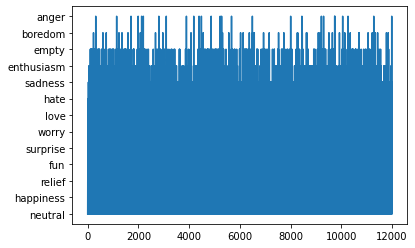

In [28]:
#Random Forest Classifier
rfc = RandomForestClassifier(random_state = 1)
param_grid = {'n_estimators': [35, 40, 45, 50]}
# parameter tuning
grid = GridSearchCV(rfc, param_grid, cv=3, scoring='accuracy', return_train_score=False, verbose=1)
# model fitting
grid_search=grid.fit(X_train, y_train)
print(grid_search.best_params_)
# test data
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(X, y)
y_test_rf=rfc.predict(X_test) 
cm = confusion_matrix(y_test,y_test_rf)
print(cm)
print(classification_report(y_test, y_test_rf))
plt.plot(y_test_rf)

In [34]:
len(y_test_rf)

12000

In [37]:
#Final Results
df=pd.DataFrame(y_test_rf, columns = ['emotion'])
df['emotion'].nunique()

new_df = pd.merge(df, music, on='emotion', how='inner')
new_df = new_df.drop('sr_number', axis=1)
new_df

,emotion,genres,songs
0,neutral,['Country music'],"['The Wolves','Heading South','Never Leave']"
1,neutral,['Country music'],"['The Wolves','Heading South','Never Leave']"
2,neutral,['Country music'],"['The Wolves','Heading South','Never Leave']"
3,neutral,['Country music'],"['The Wolves','Heading South','Never Leave']"
4,neutral,['Country music'],"['The Wolves','Heading South','Never Leave']"
...,...,...,...
11995,anger,['Soothing'],"['River flows in you','Love yourself','I wont ..."
11996,anger,['Soothing'],"['River flows in you','Love yourself','I wont ..."
11997,anger,['Soothing'],"['River flows in you','Love yourself','I wont ..."
11998,anger,['Soothing'],"['River flows in you','Love yourself','I wont ..."
